<a href="https://colab.research.google.com/github/sruthi1996/DeepLearning/blob/master/p1ch5_parameterEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [0]:
t_c = [0.5,  16.0, 15.0, 28.0, 11.0,  10.0,  3.0, -4.0,  6.0, 13.0, 2.0]
t_u = [35.7, 50.9, 58.2, 81.9, 59.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [0]:
def model(t_u, w, b): #tensor , weight and bias
    return w * t_u + b

In [0]:
def loss_fn(t_p, t_c): #loss function
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [24]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 50.9000, 58.2000, 81.9000, 59.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [25]:
loss = loss_fn(t_p, t_c)
loss

tensor(1922.5938)

In [26]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}, z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1]), z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [0]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [0]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [0]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [0]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [0]:
def dmodel_dw(t_u, w, b):
    return t_u

In [0]:
def dmodel_db(t_u, w, b):
    return 1.0

In [0]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b) 
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) 

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [49]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1922.593750
    Params: tensor([-45.8999,  -0.8496])
    Grad:   tensor([4689.9873,   84.9636])
Epoch 2, Loss 6217145.500000
    Params: tensor([2650.5754,   46.7354])
    Grad:   tensor([-269647.5312,   -4758.5078])
Epoch 3, Loss 20550885376.000000
    Params: tensor([-152380.0781,   -2690.3743])
    Grad:   tensor([15503066.0000,   273710.9688])
...
Epoch 10, Loss 88619155845242603792844308313276416.000000
    Params: tensor([3.1643e+17, 5.5866e+15])
    Grad:   tensor([-3.2193e+19, -5.6838e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8193e+19, -3.2120e+17])
    Grad:   tensor([1.8509e+21, 3.2678e+19])


tensor([-1.8193e+19, -3.2120e+17])

In [51]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1922.593750
    Params: tensor([ 0.5310, -0.0085])
    Grad:   tensor([4689.9873,   84.9636])
Epoch 2, Loss 365.799286
    Params: tensor([ 0.3363, -0.0121])
    Grad:   tensor([1946.6121,   36.5289])
Epoch 3, Loss 97.600128
    Params: tensor([ 0.2555, -0.0138])
    Grad:   tensor([807.9417,  16.4255])
...
Epoch 10, Loss 41.776260
    Params: tensor([ 0.1984, -0.0163])
    Grad:   tensor([1.6766, 2.1905])
Epoch 11, Loss 41.775589
    Params: tensor([ 0.1983, -0.0165])
    Grad:   tensor([0.6736, 2.1728])
...
Epoch 99, Loss 41.734535
    Params: tensor([ 0.1986, -0.0355])
    Grad:   tensor([-0.0381,  2.1568])
Epoch 100, Loss 41.734066
    Params: tensor([ 0.1986, -0.0357])
    Grad:   tensor([-0.0381,  2.1568])


tensor([ 0.1986, -0.0357])

In [0]:
t_un = 0.1 * t_u

In [53]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 1, Loss 69.866890
    Params: tensor([1.5728, 0.0795])
    Grad:   tensor([-57.2817,  -7.9491])
Epoch 2, Loss 46.492977
    Params: tensor([1.8025, 0.0983])
    Grad:   tensor([-22.9652,  -1.8766])
Epoch 3, Loss 42.770596
    Params: tensor([1.8959, 0.0929])
    Grad:   tensor([-9.3425,  0.5318])
...
Epoch 10, Loss 41.762241
    Params: tensor([ 1.9809, -0.0440])
    Grad:   tensor([-0.3847,  2.0917])
Epoch 11, Loss 41.717045
    Params: tensor([ 1.9847, -0.0649])
    Grad:   tensor([-0.3757,  2.0896])
...
Epoch 99, Loss 38.291981
    Params: tensor([ 2.2867, -1.7705])
    Grad:   tensor([-0.3181,  1.7967])
Epoch 100, Loss 38.258713
    Params: tensor([ 2.2899, -1.7885])
    Grad:   tensor([-0.3176,  1.7936])


tensor([ 2.2899, -1.7885])

In [54]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params

Epoch 1, Loss 69.866890
Epoch 2, Loss 46.492977
Epoch 3, Loss 42.770596
...
Epoch 10, Loss 41.762241
Epoch 11, Loss 41.717045
...
Epoch 99, Loss 38.291981
Epoch 100, Loss 38.258713
...
Epoch 4000, Loss 28.615252
Epoch 5000, Loss 28.615234


tensor([  4.1325, -12.1946])

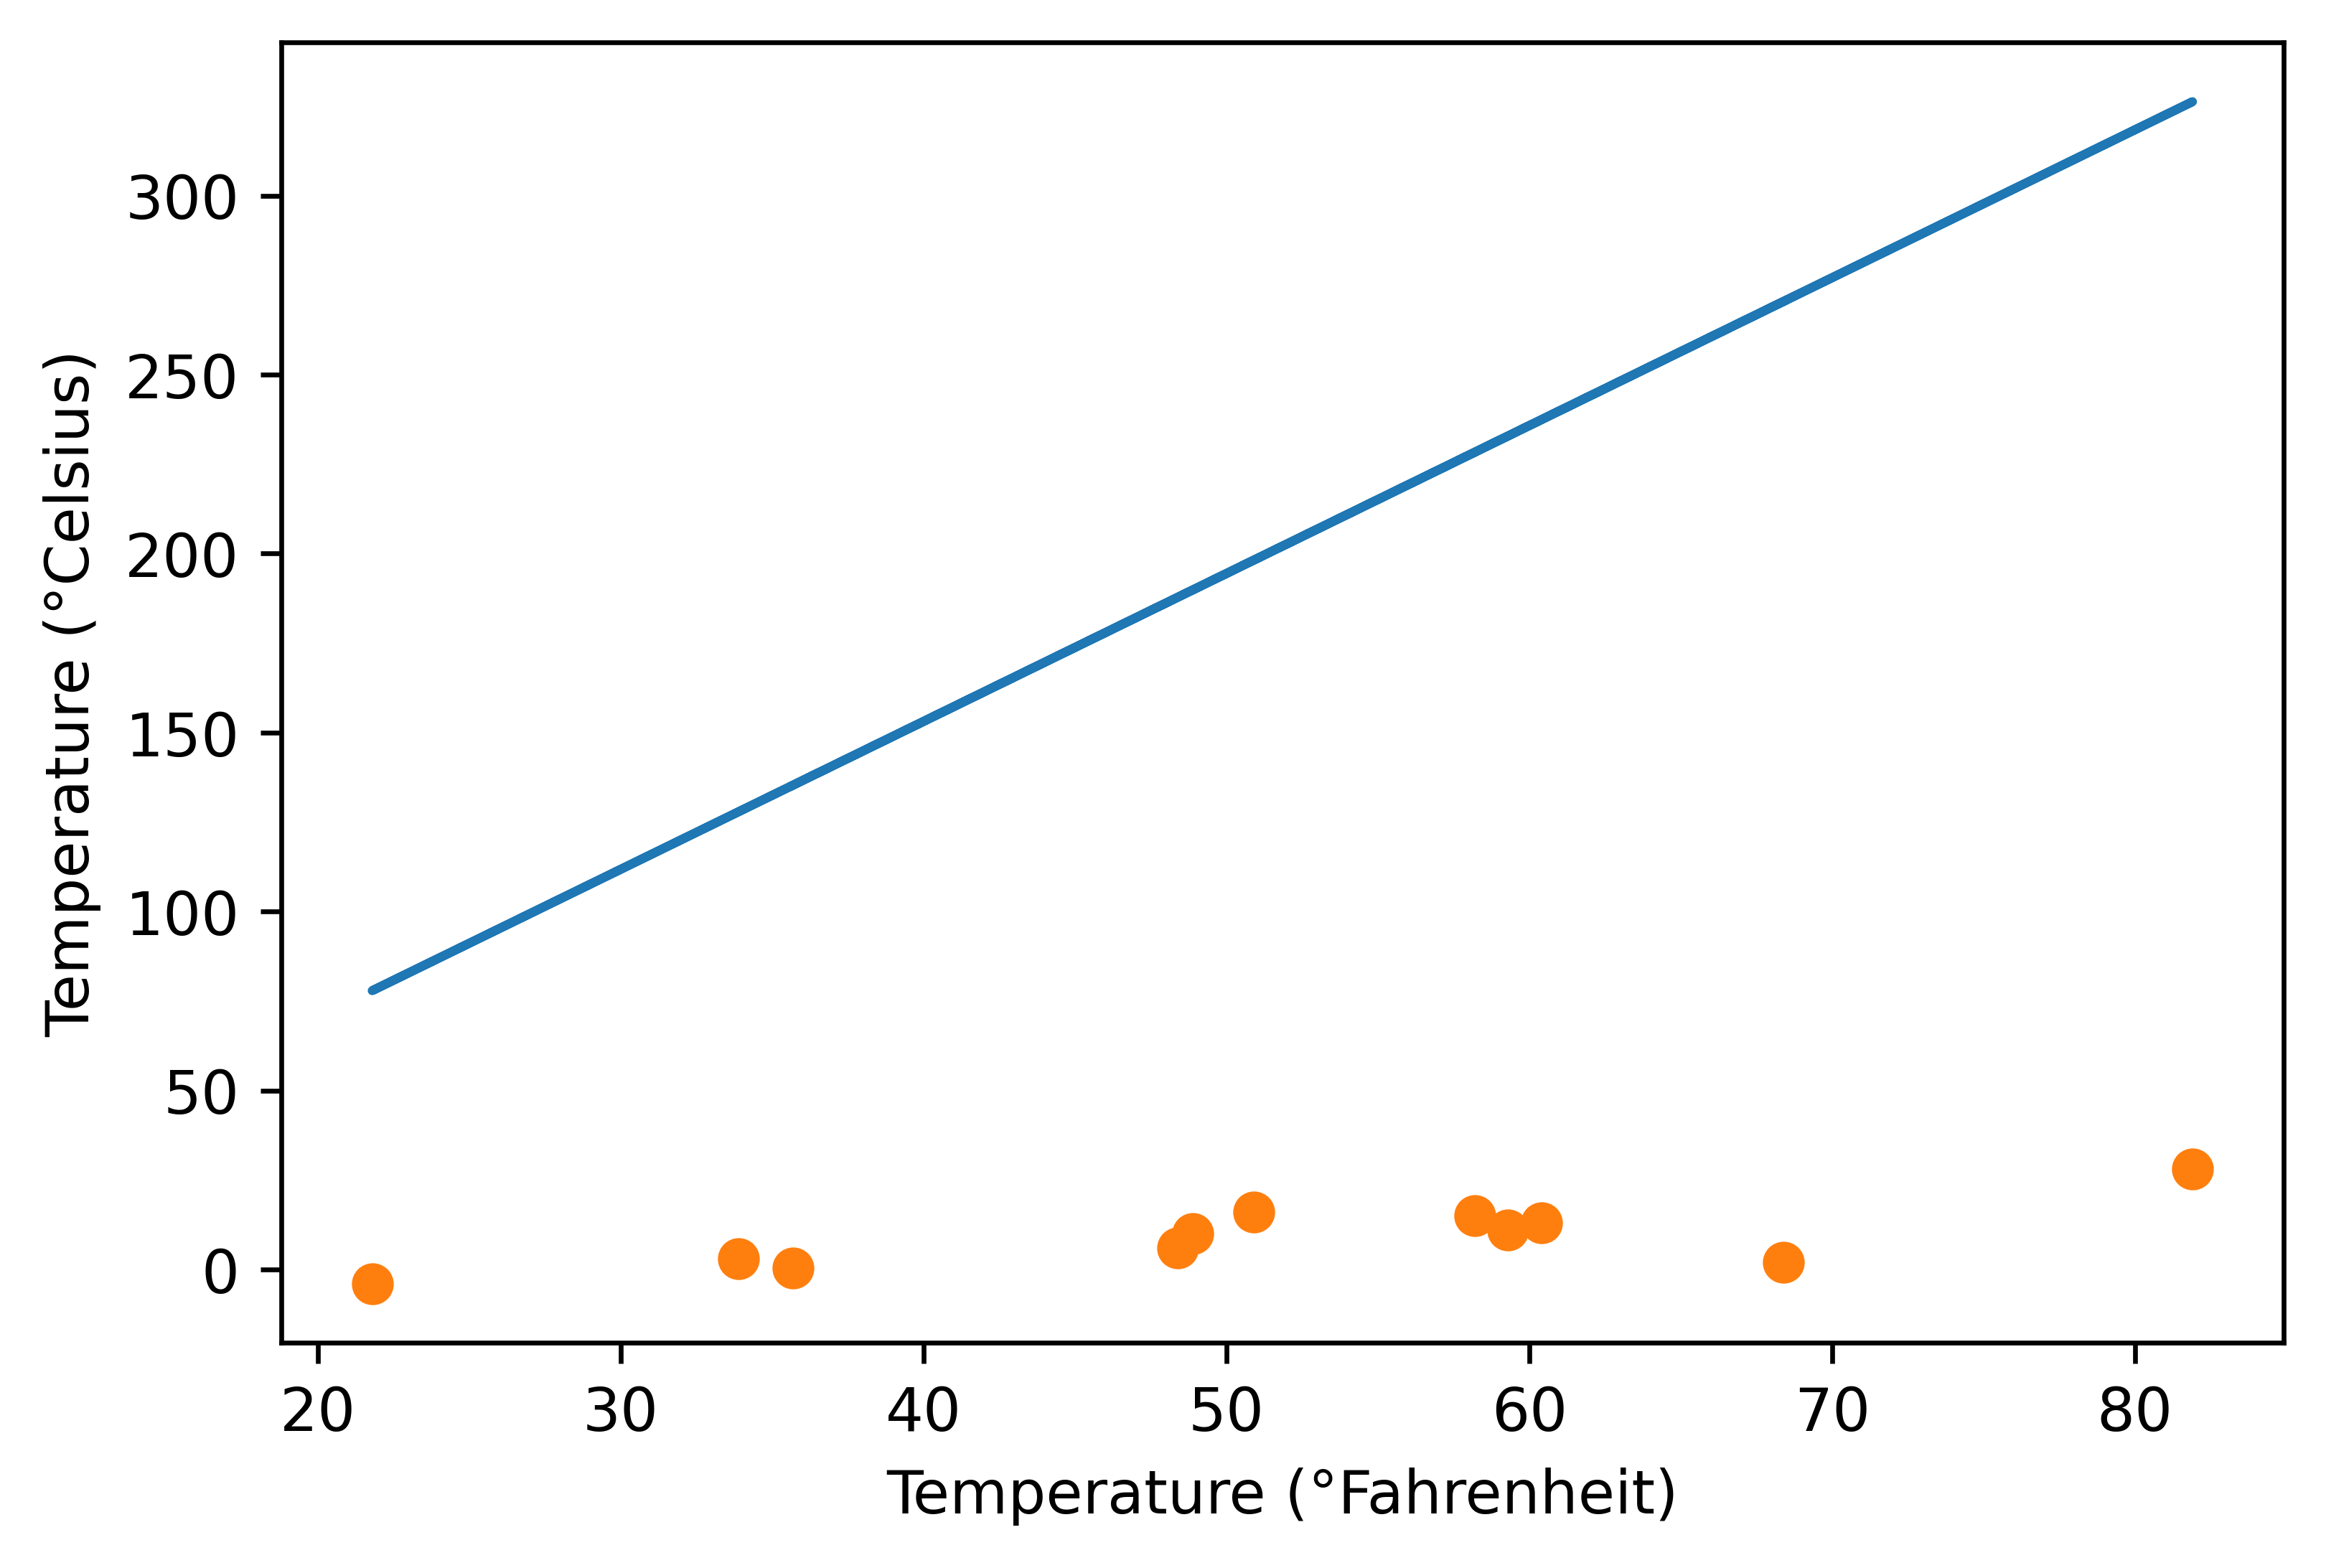

In [55]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_u, *params)  # <1>
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")

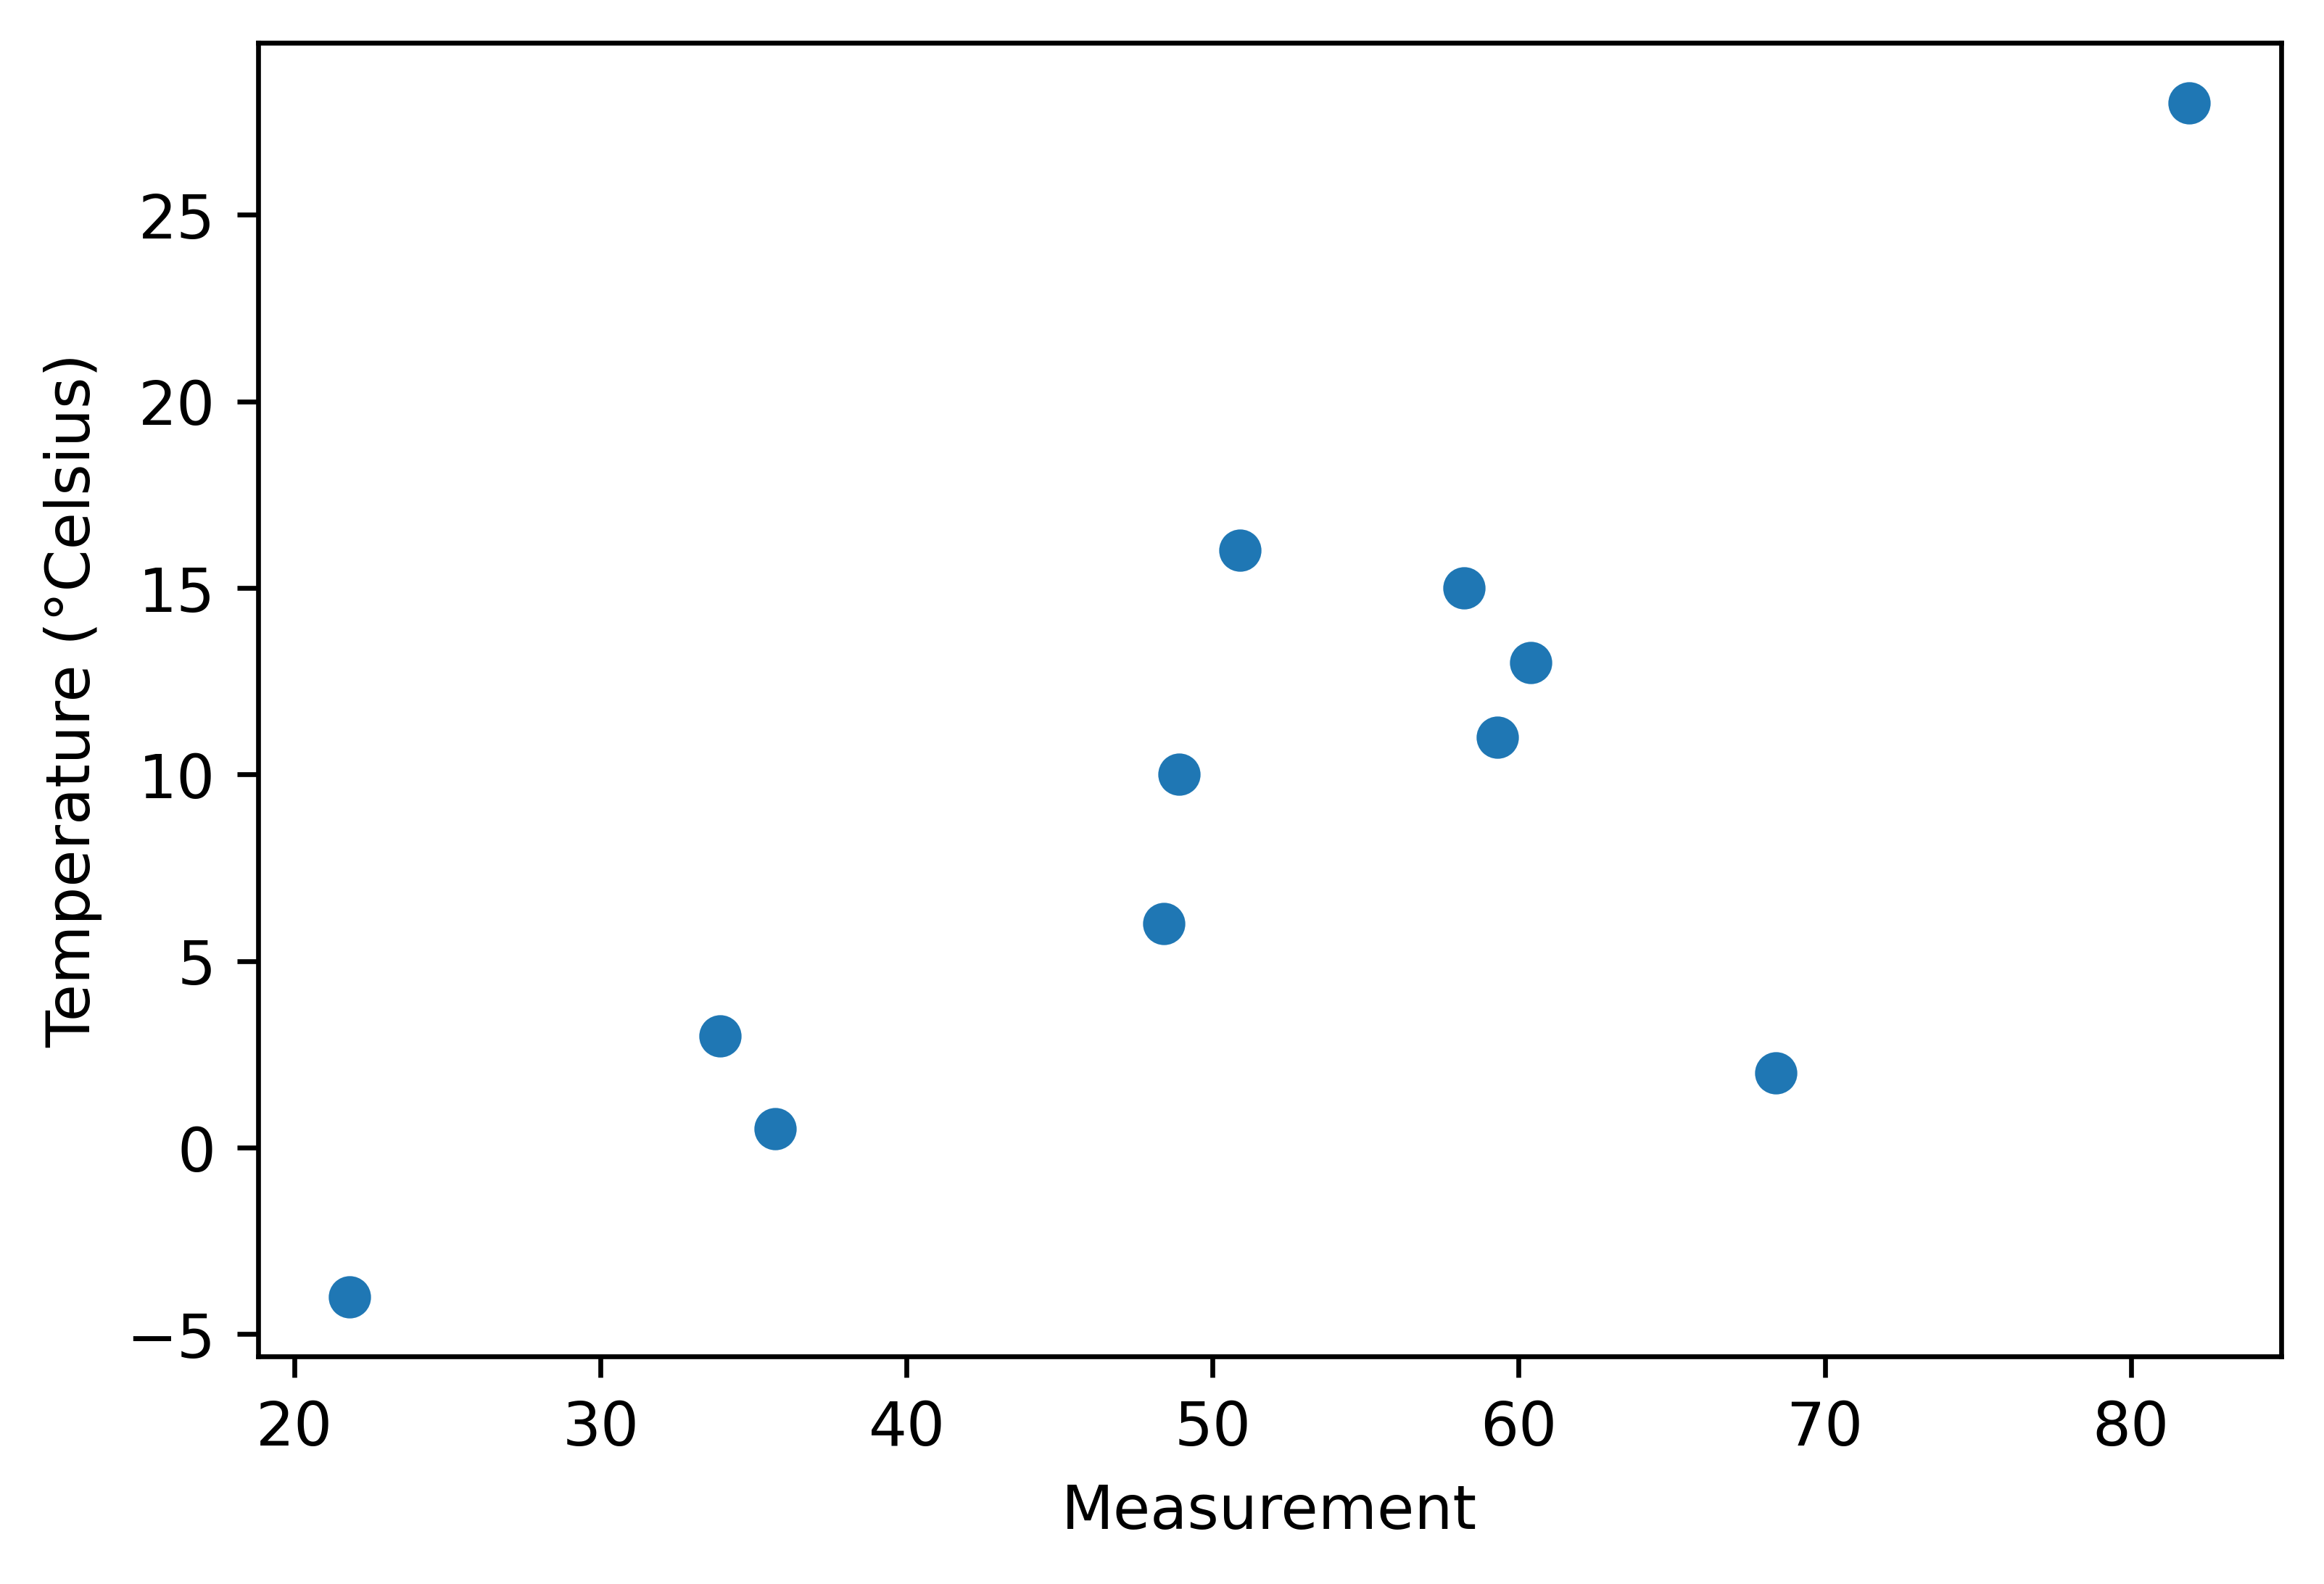

In [56]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")